Tomado de: http://stamfordresearch.com/outlier-removal-in-python-using-iqr-rule/

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)

sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
df = pd.read_csv('C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\Titanic Complete.csv')

# View
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Visualise the data

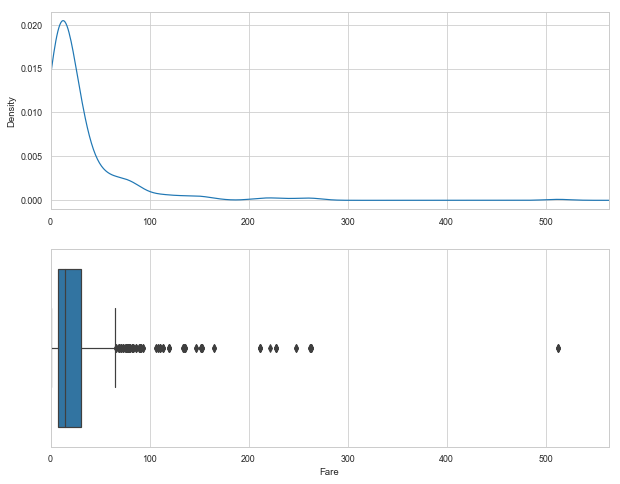

In [3]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

## Transform the data

In [4]:
# Remove any zeros (otherwise we get (-inf)
df.loc[df.Fare == 0, 'Fare'] = np.nan

# Drop NA
df.dropna(inplace=True)

# Log Transform
df['Log_' + i] = np.log(df[i])

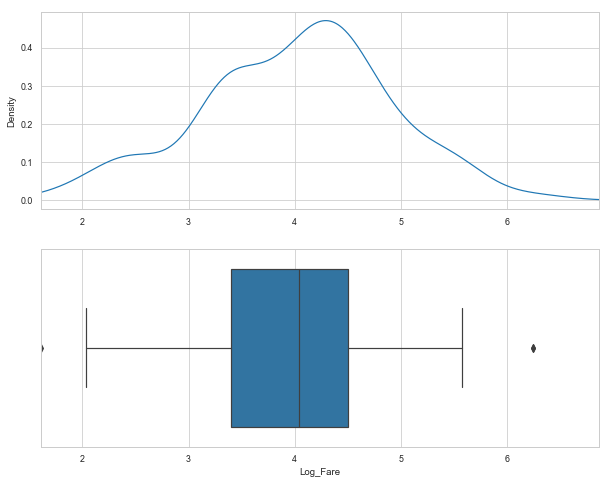

In [5]:
i = 'Log_Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

## Determine the Min and Max
Next we need to determine the min and max cuttoffs for detecting the outliers. As discussed here we do this…

Step 1, get the  Interquartile Range

Step 2, calculate the upper and lower values

 MaxIQRIn Python this is…

In [6]:
q75, q25 = np.percentile(df.Log_Fare.dropna(), [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

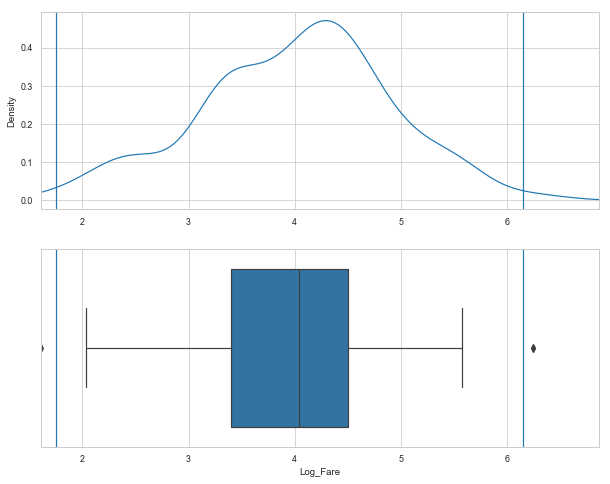

In [7]:
i = 'Log_Fare'

plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

## Finishing touches
Now lets identify the outliers. First we set a new variable in the dataframe called ‘Outlier’ defaulted to 0, then is a row is outside this range we set it to 1. Note: i should still be ‘Log_Fare’

In [8]:
df['Outlier'] = 0

df.loc[df[i] < min, 'Outlier'] = 1
df.loc[df[i] > max, 'Outlier'] = 1

In [9]:
df[df['Outlier'] == 1]

PassengerId  Survived  Pclass                                Name   Sex  \
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  male   
737          738         1       1              Lesurer, Mr. Gustave J  male   
872          873         0       1            Carlsson, Mr. Frans Olof  male   

      Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  Log_Fare  \
679  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  6.238967   
737  35.0      0      0  PC 17755  512.3292         B101        C  6.238967   
872  33.0      0      0       695    5.0000  B51 B53 B55        S  1.609438   

     Outlier  
679        1  
737        1  
872        1